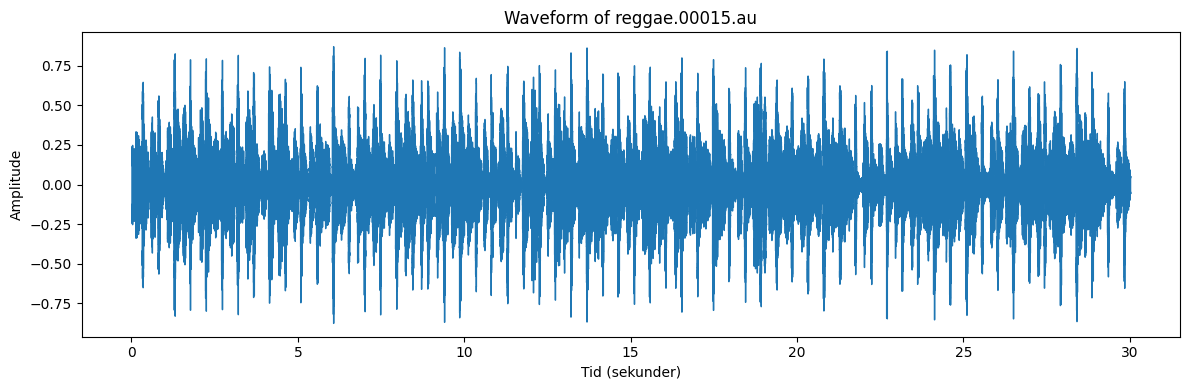

Sample rate: 22050
Varighed (sekunder): 30.013333333333332


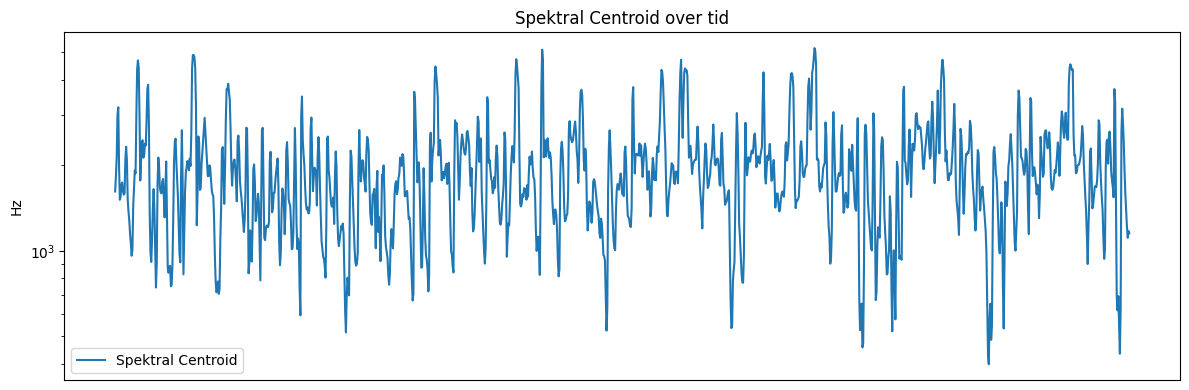

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Sti til lydfilen 
file_path = '../genres/reggae/reggae.00015.au'

# Indlæs lydfilen med librosa
y, sr = librosa.load(file_path, sr=None)  # sr=None bevarer original sample rate

# Visualiser lydbølgen
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of reggae.00015.au')
plt.xlabel('Tid (sekunder)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Ekstraher nogle simple lydfeatures
print("Sample rate:", sr)
print("Varighed (sekunder):", len(y)/sr)

# Eksempel: Udregn og plot spektral centroid 
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure(figsize=(12, 4))
plt.semilogy(centroid.T, label='Spektral Centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.legend()
plt.title('Spektral Centroid over tid')
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np

# Sti til lydfilen
file_path = '../genres/reggae/reggae.00015.au'

# Indlæs lyd
y, sr = librosa.load(file_path, sr=None)

# Udtræk tempo
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# Udtræk MFCC 
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # 13 MFCC-koefficienter

# Udregn gennemsnit og standardafvigelse for hver MFCC-koefficient
mfcc_means = mfccs.mean(axis=1)
mfcc_stds = mfccs.std(axis=1)

# Kombinér alle features i én vektor
features = np.hstack([tempo, mfcc_means, mfcc_stds])

# Print features
print("Feature vektor for sangen:")
print("Tempo:", tempo)
print("MFCC middelværdi:", mfcc_means)
print("MFCC standardafvigelse:", mfcc_stds)
print("Samlet feature-vektor (længde:", len(features), ")")


Feature vektor for sangen:
Tempo: [129.19921875]
MFCC middelværdi: [-157.81721    109.850296     8.465338    41.79409      5.1190033
   25.75197    -12.951751    22.064224   -15.503764    14.367301
  -11.917588    11.595214   -10.627038 ]
MFCC standardafvigelse: [62.1974   29.05702  22.798779 16.59304  14.195414 13.917952 13.702848
 11.057382 11.178564 11.57377   8.914884  9.245471  8.546162]
Samlet feature-vektor (længde: 27 )


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# Mappestien til genre-data
data_dir = '../genres'
genres = os.listdir(data_dir)

# Her gemmer vi alle feature-vektorer
data = []

for genre in tqdm(genres):
    genre_path = os.path.join(data_dir, genre)
    
    if not os.path.isdir(genre_path):
        continue

    for filename in os.listdir(genre_path):
        if filename.endswith('.au'):
            file_path = os.path.join(genre_path, filename)

            try:
                y, sr = librosa.load(file_path, sr=None)
                tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

                mfcc_means = mfccs.mean(axis=1)
                mfcc_stds = mfccs.std(axis=1)
                features = np.hstack([tempo, mfcc_means, mfcc_stds])

                row = features.tolist()
                row.append(genre)  

                data.append(row)

            except Exception as e:
                print(f"Fejl med filen {file_path}: {e}")

# Kolonnenavne
columns = ['tempo'] + \
          [f'mfcc_mean_{i+1}' for i in range(13)] + \
          [f'mfcc_std_{i+1}' for i in range(13)] + \
          ['genre']

# Lav DataFrame
df = pd.DataFrame(data, columns=columns)

# Gem som CSV
df.to_csv('genre_features.csv', index=False)

print("✅ Datasæt gemt som genre_features.csv")
print(df.head())


100%|██████████| 10/10 [01:01<00:00,  6.13s/it]

✅ Datasæt gemt som genre_features.csv
        tempo  mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  mfcc_mean_4  \
0  123.046875  -113.598824   121.570671   -19.162262    42.363941   
1   67.999589  -207.523834   123.985138     8.947020    35.867149   
2  161.499023   -90.757164   140.440872   -29.084547    31.686693   
3   63.024009  -199.575134   150.086105     5.663404    26.855278   
4  135.999178  -160.354172   126.209496   -35.581394    22.139256   

   mfcc_mean_5  mfcc_mean_6  mfcc_mean_7  mfcc_mean_8  mfcc_mean_9  ...  \
0    -6.362266    18.621931   -13.699734    15.339802   -12.274305  ...   
1     2.909595    21.519472    -8.556513    23.370676   -10.103608  ...   
2   -13.976547    25.753752   -13.664990    11.634442   -11.778322  ...   
3     1.770072    14.232647    -4.827845     9.286853    -0.756120  ...   
4   -32.473549    10.850701   -23.350071     0.493249   -11.796538  ...   

   mfcc_std_5  mfcc_std_6  mfcc_std_7  mfcc_std_8  mfcc_std_9  mfcc_std_10  \
0   12.961207    9

In [12]:
import pandas as pd

df = pd.read_csv('genre_features.csv')
print(df.shape)
df.head()



(1000, 28)


,tempo,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,genre
0,123.046875,-113.598824,121.570671,-19.162262,42.363941,-6.362266,18.621931,-13.699734,15.339802,-12.274305,...,12.961207,9.443115,8.222110,8.306714,9.067515,7.959054,7.859071,7.161058,6.419960,blues
1,67.999589,-207.523834,123.985138,8.947020,35.867149,2.909595,21.519472,-8.556513,23.370676,-10.103608,...,16.732485,12.504671,14.170464,11.940147,12.888547,10.215540,10.254578,9.808391,8.054382,blues
2,161.499023,-90.757164,140.440872,-29.084547,31.686693,-13.976547,25.753752,-13.664990,11.634442,-11.778322,...,12.476432,8.625063,10.336393,10.320866,8.092110,8.236647,7.594205,8.030863,7.771137,blues
3,63.024009,-199.575134,150.086105,5.663404,26.855278,1.770072,14.232647,-4.827845,9.286853,-0.756120,...,16.369904,11.260880,12.487864,9.015004,9.607383,8.448777,10.500921,6.943667,7.535000,blues
4,135.999178,-160.354172,126.209496,-35.581394,22.139256,-32.473549,10.850701,-23.350071,0.493249,-11.796538,...,18.341904,11.613141,9.658858,11.168416,11.400675,9.985847,8.957854,9.297123,9.462997,blues


Accuracy: 0.64

Classification report:
               precision    recall  f1-score   support

       blues       0.57      0.60      0.59        20
   classical       1.00      0.92      0.96        13
     country       0.81      0.63      0.71        27
       disco       0.54      0.62      0.58        21
      hiphop       0.43      0.60      0.50        15
        jazz       0.83      0.86      0.84        22
       metal       0.70      0.84      0.76        25
         pop       0.54      0.54      0.54        13
      reggae       0.50      0.39      0.44        23
        rock       0.53      0.43      0.47        21

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.64      0.64       200



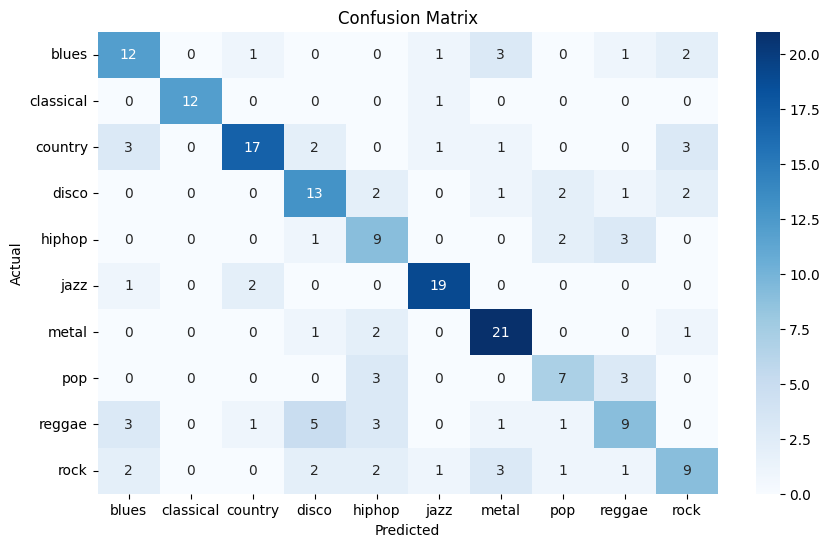

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Indlæs datasættet
df = pd.read_csv('genre_features.csv')

# Opdel data og labels
X = df.drop('genre', axis=1)
y = df['genre']

# Split til træning/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forudsigelser
y_pred = model.predict(X_test)

# Evaluering
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import librosa
import numpy as np

# Filsti til en ny sang
file_path = '../genres/disco/disco.00037.au'

# Indlæs og udtræk features 
y, sr = librosa.load(file_path, sr=None)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

mfcc_means = mfccs.mean(axis=1)
mfcc_stds = mfccs.std(axis=1)
features = np.hstack([tempo, mfcc_means, mfcc_stds])

# Forudsig med trænet model
features_reshaped = features.reshape(1, -1)
predicted_genre = model.predict(features_reshaped)[0]

print(f"🎧 Model gætter: {predicted_genre}")
print(f"✅ Korrekt genre: disco")


🎧 Model gætter: disco
✅ Korrekt genre: disco


c:\Users\tobia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
